In [ ]:
!git clone https://github.com/ayulockin/synthetic_datasets
%cd synthetic_datasets/MNIST/
%mkdir images


!unzip -q MNIST_Converted_Training.zip -d images/
!unzip -q MNIST_Converted_Testing.zip -d images/

Cloning into 'synthetic_datasets'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 42 (delta 1), reused 1 (delta 1), pack-reused 39
Unpacking objects: 100% (42/42), done.
/content/synthetic_datasets/MNIST


In [ ]:
%cd ../..

/content


In [ ]:
import pandas as pd
from os import path

S = 'synthetic_datasets'
M = 'MNIST'
I = 'images'

train_df = pd.read_csv(path.join(S, M, 'training_data.csv'), header=None)
columns = ['path', 'class_index', 'xmin', 'ymin', 'xmax', 'ymax']

train_df.columns = columns

test_df = pd.read_csv(path.join(S, M, 'test_data.csv'), header=None)
test_df.columns = columns

t = 'MNIST_Converted_Training'
train_df['path'] = train_df['path'].apply(lambda s: path.join(S, M, I, t, s))

t = 'MNIST_Converted_Testing'
test_df['path'] = test_df['path'].apply(lambda s: path.join(S, M, I, t, s))

test_df

,path,class_index,xmin,ymin,xmax,ymax
0,synthetic_datasets/MNIST/images/MNIST_Converte...,2,0.20,0.45,0.48,0.73
1,synthetic_datasets/MNIST/images/MNIST_Converte...,0,0.02,0.03,0.30,0.31
2,synthetic_datasets/MNIST/images/MNIST_Converte...,4,0.55,0.39,0.83,0.67
3,synthetic_datasets/MNIST/images/MNIST_Converte...,8,0.38,0.42,0.66,0.70
4,synthetic_datasets/MNIST/images/MNIST_Converte...,7,0.69,0.17,0.97,0.45
...,...,...,...,...,...,...
9995,synthetic_datasets/MNIST/images/MNIST_Converte...,5,0.46,0.34,0.74,0.62
9996,synthetic_datasets/MNIST/images/MNIST_Converte...,9,0.54,0.25,0.82,0.53
9997,synthetic_datasets/MNIST/images/MNIST_Converte...,8,0.50,0.32,0.78,0.60
9998,synthetic_datasets/MNIST/images/MNIST_Converte...,0,0.62,0.61,0.90,0.89


In [ ]:
row_1 = train_df.iloc[0].to_numpy().tolist()
row_1

['synthetic_datasets/MNIST/images/MNIST_Converted_Training/converted_training1.png',
 4,
 0.49,
 0.15,
 0.77,
 0.43]

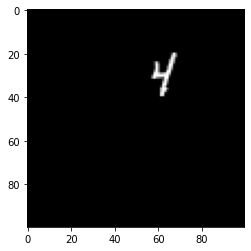

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_image_for_vis(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=1)
  image = tf.image.grayscale_to_rgb(image)
  image = image.numpy().astype(np.uint8)
  return image

plt.imshow(load_image_for_vis(row_1[0]))

49 15 77 43
28 28


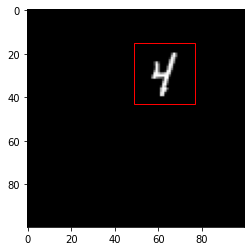

In [ ]:
import matplotlib.patches as patches
from PIL import Image

im = load_image_for_vis(row_1[0])
fig, ax = plt.subplots()
ax.imshow(im)

x1, y1, x2, y2 = [int(v*100) for v in row_1[2:]]
print(x1, y1, x2, y2)
width = x2 - x1
height = y2 - y1

print(width, height)
# x, y, width, height
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

In [ ]:
len(test_df)

10000

In [ ]:
train_df['class_index'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: class_index, dtype: int64

In [ ]:
val_df, test_df = test_df[:5000], test_df[5000:]

len(val_df), len(test_df)

(5000, 5000)

In [ ]:
box_columns = ['xmin', 'ymin', 'xmax', 'ymax']

boxes_train = train_df[box_columns].to_numpy()
boxes_val =  val_df[box_columns].to_numpy()
boxes_test = test_df[box_columns].to_numpy()

class_indexes_train = train_df['class_index'].to_numpy()
class_indexes_val = val_df['class_index'].to_numpy()
class_indexes_test = test_df['class_index'].to_numpy()

In [ ]:
import tensorflow as tf

@tf.function
def load_image(image_path, label_dict):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=1)
  image = tf.image.grayscale_to_rgb(image)
  return (image, label_dict)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['path'].tolist(),
                                                    {'box': boxes_train,
                                                     'class': class_indexes_train}))
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_df['path'].tolist(),
                                                    {'box': boxes_val,
                                                     'class': class_indexes_val}))
val_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['path'].tolist(),
                                                    {'box': boxes_test,
                                                     'class': class_indexes_test}))
test_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), {'box': TensorSpec(shape=(4,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(), dtype=tf.int64, name=None)})>

In [ ]:
iterator = iter(train_dataset)

In [ ]:
load_image(*next(iterator))[0].numpy().shape

(100, 100, 3)

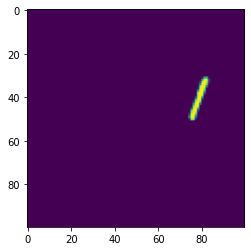

In [ ]:
plt.imshow(load_image(*next(iterator))[0].numpy()[:, :, 0])

In [ ]:
from tensorflow.data import AUTOTUNE

SHUFFLE_VAL = len(train_dataset)
BATCH_SIZE = 4

train_dataset = train_dataset.shuffle(SHUFFLE_VAL).map(load_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)

val_dataset = val_dataset.map(load_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)

test_dataset = test_dataset.map(load_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)

train_dataset, val_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), {'box': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), {'box': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), {'box': TensorSpec(shape=(None, 4), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.int64, name=None)})>)

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S

model = EfficientNetV2S(weights='imagenet',
                         include_top=False,
                         input_shape=(100, 100, 3))

82436096/82420632 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers[:-5]:
  layer.trainable = False

In [ ]:
model.summary()

Model: "efficientnetv2-s"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 100, 100, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 50, 50, 24)   648         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 50, 50, 24)   96          ['stem_conv[0][0]'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

my_model = Sequential([model,
                       GlobalAveragePooling2D(),
                       Dense(64, activation='relu')])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 4, 4, 1280)       20331360  
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
Total params: 20,413,344
Trainable params: 412,736
Non-trainable params: 20,000,608
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Model

img_input = Input((100, 100, 3))

feature_vector = my_model(img_input)

class_output_path = Dense(128, activation='relu')(feature_vector)
class_output_path = Dense(10, activation='softmax',
                          name='class')(class_output_path)



box_output_path = Dense(32, activation='relu')(feature_vector)
box_output_path = Dense(4, name='box')(box_output_path)

model_1 = Model(inputs=img_input, outputs=[class_output_path,
                                           box_output_path])

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 64)           20413344    ['input_2[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          8320        ['sequential[0][0]']             
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['sequential[0][0]']         

In [ ]:
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, MeanAbsoluteError

model_1.compile(loss={'class': SparseCategoricalCrossentropy(),
                      'box': MeanSquaredError()},
                optimizer=Adam(learning_rate=0.001),
                metrics={'class': ['accuracy'],
                         'box': [MeanAbsoluteError()]},
                loss_weights={'class':1, 'box':100})

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=1, monitor='val_loss')

In [ ]:
model_1.fit(train_dataset, validation_data=val_dataset, epochs=1000, callbacks=[es])

Epoch 1/1000
 1699/15000 [==>...........................] - ETA: 31:47 - loss: 0.9057 - class_loss: 0.6130 - box_loss: 0.0029 - class_accuracy: 0.7962 - box_mean_absolute_error: 0.0418

KeyboardInterrupt: ignored

In [ ]:
 # To save your trained model:

 # model_1.save('model')

In [ ]:
# To downlaod your saved model, zip with code below then download

# !zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/keras_metadata.pb (deflated 97%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: model/variables/variables.index (deflated 77%)
  adding: model/saved_model.pb (deflated 92%)
  adding: model/assets/ (stored 0%)


In [ ]:
# Link to my model.zip: https://drive.google.com/drive/folders/1-Pj68oZEXeM4QZdB5xqqKaEZlAjHzy2e?usp=sharing

In [ ]:
# To unzip a zipped model folder:

# !unzip model.zip

Archive:  model.zip
replace model/keras_metadata.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: model/keras_metadata.pb  
  inflating: model/variables/variables.data-00000-of-00001  
  inflating: model/variables/variables.index  
  inflating: model/saved_model.pb    


In [ ]:
# To load a model back in memory from an unzipped model folder:

# model_1 = tf.keras.models.load_model('model')

# model_1

15 49 43 77
28 28


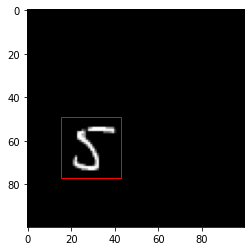

In [ ]:
row_1 = test_df.iloc[2].to_numpy().tolist()

im = load_image_for_vis(row_1[0])
fig, ax = plt.subplots()
ax.imshow(im)

x1, y1, x2, y2 = [int(v*100) for v in row_1[2:]]
print(x1, y1, x2, y2)
width = x2 - x1
height = y2 - y1

print(width, height)
# x, y, width, height
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

In [ ]:
np.array([load_image_for_vis(row_1[0])]).shape

(1, 100, 100, 3)

In [ ]:
img = np.array([load_image_for_vis(row_1[0])])

prediction_array = model_1.predict(img)
prediction_array

[array([[3.3891798e-04, 1.1996742e-03, 6.5498149e-01, 2.5052587e-03,
         2.3624101e-03, 1.9797817e-01, 1.4829485e-02, 1.2163697e-01,
         8.3003676e-04, 3.3376636e-03]], dtype=float32),
 array([[0.16877832, 0.45548257, 0.41187245, 0.67109454]], dtype=float32)]

In [ ]:
predicted_box = prediction_array[1].tolist()[0]
predicted_class = np.argmax(prediction_array[0].tolist()[0])

predicted_class, predicted_box

(2,
 [0.16877831518650055,
  0.4554825723171234,
  0.4118724465370178,
  0.671094536781311])

16 45 41 67
25 22


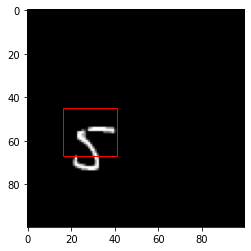

In [ ]:
im = load_image_for_vis(row_1[0])
fig, ax = plt.subplots()
ax.imshow(im)

x1, y1, x2, y2 = [int(v*100) for v in predicted_box]
print(x1, y1, x2, y2)
width = x2 - x1
height = y2 - y1

print(width, height)
# x, y, width, height
rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

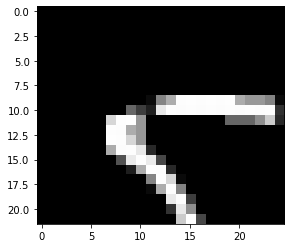

In [ ]:
plt.imshow(im[y1:y2, x1:x2])